<a href="https://colab.research.google.com/github/fawaid98/portfolio/blob/main/K_Means_and_Average_Linkage_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.io.formats.format import DataFrameFormatter

           Date    ADRO    ANTM    ASII    BBCA    BBNI    BBRI    BBTN  \
0    2020-11-30  1390.0  1145.0  5300.0  6205.0  6000.0  4090.0  1645.0   
1    2020-12-01  1390.0  1155.0  5550.0  6395.0  6250.0  4240.0  1720.0   
2    2020-12-02  1390.0  1245.0  5725.0  6450.0  6350.0  4300.0  1740.0   
3    2020-12-03  1375.0  1255.0  5625.0  6460.0  6350.0  4400.0  1720.0   
4    2020-12-04  1435.0  1245.0  5700.0  6390.0  6350.0  4300.0  1720.0   
..          ...     ...     ...     ...     ...     ...     ...     ...   
239  2021-11-22  1640.0  2370.0  6200.0  7475.0  7175.0  4280.0  1860.0   
240  2021-11-23  1705.0  2400.0  6250.0  7475.0  7000.0  4210.0  1815.0   
241  2021-11-24  1695.0  2440.0  6225.0  7475.0  7075.0  4210.0  1815.0   
242  2021-11-25  1745.0  2440.0  6225.0  7425.0  7175.0  4220.0  1820.0   
243  2021-11-26  1655.0  2340.0  5900.0  7275.0  6875.0  4160.0  1790.0   

       BMRI    BRPT  ...    MIKA    PGAS    PTBA     SMGR    TBIG    TINS  \
0    6325.0  1050.0  .

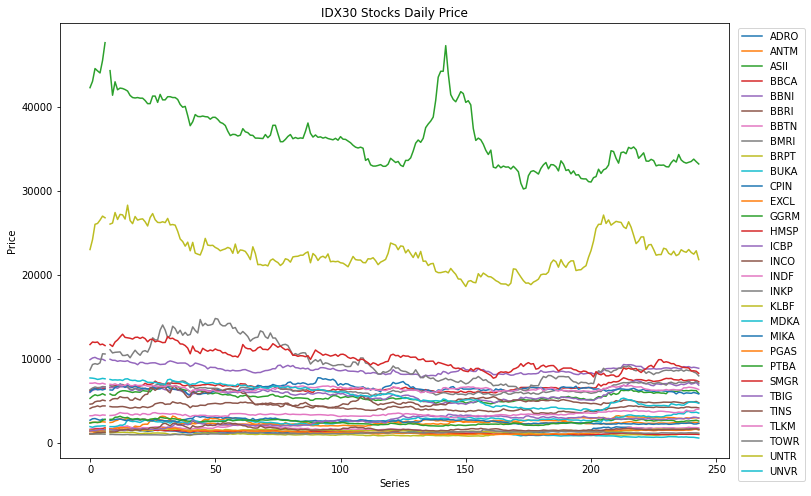

In [2]:
#Importing Data

code = ['ADRO','ANTM','ASII','BBCA','BBNI','BBRI','BBTN',
'BMRI','BRPT','BUKA','CPIN','EXCL','GGRM','HMSP','ICBP',
'INCO','INDF','INKP','KLBF','MDKA','MIKA','PGAS','PTBA',
'SMGR','TBIG','TINS','TLKM','TOWR','UNTR','UNVR']

price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/price_idx30.csv')
print(price)

s = range(0,244)
plt.figure(figsize=(12,8))
plt.xlabel('Series')
plt.ylabel('Price')
plt.title('IDX30 Stocks Daily Price')
for i in range(0,30):
  plt.plot(s,price[code[i]], label=code[i])
plt.legend(loc=1, bbox_to_anchor=(1.12, 1))

In [4]:
#Data Transformation

rtrn = (price[code] - price[code].shift(1))/price[code].shift(1)
exrt = rtrn.mean()
sig = rtrn.std()
var = -1*(exrt+(sig*(-1.65)))
df_km = pd.DataFrame(data={'Exp. Return':exrt, 'VaR':var})
df_al = pd.DataFrame(data={'Exp. Return':exrt, 'VaR':var})


In [6]:
#K-Means Clustering
km = KMeans(n_clusters=3)
cluster_km = km.fit_predict(df_km[['Exp. Return', 'VaR']])
df_km['Cluster'] = cluster_km

df1_km = df_km[df_km.Cluster==0]
print('CLuster 1')
print(df1_km)
print('Total Member =',len(df1_km))

df2_km = df_km[df_km.Cluster==1]
print('\nCLuster 2')
print(df2_km)
print('Total Member =',len(df2_km))

df3_km = df_km[df_km.Cluster==2]
print('\nCLuster 3')
print(df3_km)
print('Total Member =',len(df3_km))

CLuster 1
      Exp. Return       VaR  Cluster
ADRO     0.001085  0.043706        0
BBTN     0.000654  0.039362        0
CPIN     0.000147  0.037329        0
EXCL     0.001235  0.039045        0
INCO     0.000589  0.049265        0
KLBF     0.000462  0.036889        0
MIKA    -0.000223  0.039640        0
PGAS     0.000955  0.047804        0
PTBA     0.000713  0.038712        0
SMGR    -0.001164  0.043018        0
TOWR     0.000636  0.037569        0
UNTR     0.000214  0.041608        0
UNVR    -0.001791  0.036764        0
Total Member = 13

CLuster 2
      Exp. Return       VaR  Cluster
ANTM     0.003465  0.063549        1
BRPT     0.000462  0.054079        1
BUKA    -0.007123  0.068267        1
INKP     0.000034  0.056659        1
MDKA     0.003325  0.056408        1
TBIG     0.003550  0.051606        1
TINS     0.002392  0.065637        1
Total Member = 7

CLuster 3
      Exp. Return       VaR  Cluster
ASII     0.000555  0.032635        2
BBCA     0.000715  0.023705        2
BBNI    

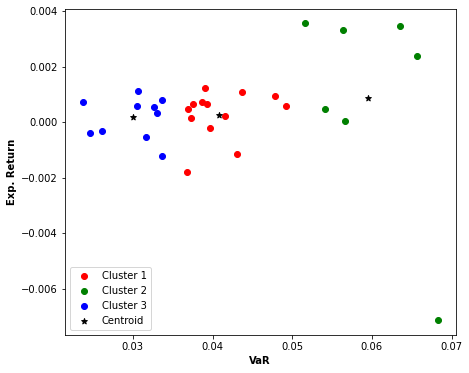

In [7]:
#Scatter Plot of 3 Cluster K-Means
plt.figure(figsize = (7, 6))
plt.scatter(df1_km['VaR'], df1_km['Exp. Return'], color='red', label='Cluster 1')
plt.scatter(df2_km['VaR'], df2_km['Exp. Return'], color='green', label='Cluster 2')
plt.scatter(df3_km['VaR'], df3_km['Exp. Return'], color='blue', label='Cluster 3')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0],color='black', marker='*', label='Centroid')

plt.xlabel('VaR', fontweight ='bold')
plt.ylabel('Exp. Return', fontweight ='bold')
plt.legend(loc='lower left')

plt.show()

In [8]:
#Average Linkage Clustering 

D = linkage(df_al[['Exp. Return', 'VaR']], method='average', metric='euclidean')
cluster_al = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit_predict(df_al[['Exp. Return', 'VaR']])
df_al['Cluster']= cluster_al

df1_al = df_al[df_al.Cluster==0]
print('CLuster 1')
print(df1_al)
print('Total Member =',len(df1_al))

df2_al = df_al[df_al.Cluster==1]
print('\nCLuster 2')
print(df2_al)
print('Total Member =',len(df2_al))

df3_al = df_al[df_al.Cluster==2]
print('\nCLuster 3')
print(df3_al)
print('Total Member =',len(df3_al))


CLuster 1
      Exp. Return       VaR  Cluster
ADRO     0.001085  0.043706        0
ASII     0.000555  0.032635        0
BBCA     0.000715  0.023705        0
BBNI     0.000813  0.033714        0
BBRI     0.000342  0.033090        0
BBTN     0.000654  0.039362        0
BMRI     0.000579  0.030510        0
CPIN     0.000147  0.037329        0
EXCL     0.001235  0.039045        0
GGRM    -0.000526  0.031591        0
HMSP    -0.001217  0.033688        0
ICBP    -0.000409  0.024660        0
INDF    -0.000326  0.026150        0
KLBF     0.000462  0.036889        0
MIKA    -0.000223  0.039640        0
PTBA     0.000713  0.038712        0
SMGR    -0.001164  0.043018        0
TLKM     0.001131  0.030678        0
TOWR     0.000636  0.037569        0
UNTR     0.000214  0.041608        0
UNVR    -0.001791  0.036764        0
Total Member = 21

CLuster 2
      Exp. Return       VaR  Cluster
ANTM     0.003465  0.063549        1
BUKA    -0.007123  0.068267        1
TINS     0.002392  0.065637        1

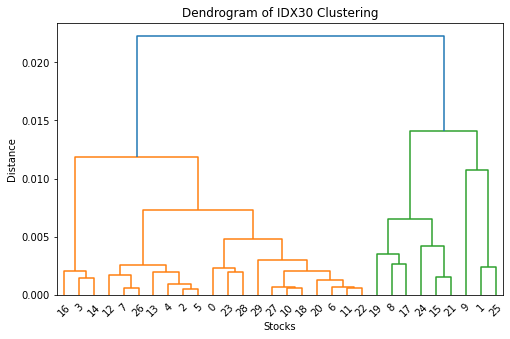

In [9]:
#Dendrogram 

plt.figure(figsize=(8,5))
plt.title('Dendrogram of IDX30 Clustering')
plt.xlabel('Stocks')
plt.ylabel('Distance')
dendrogram(D)
plt.show()

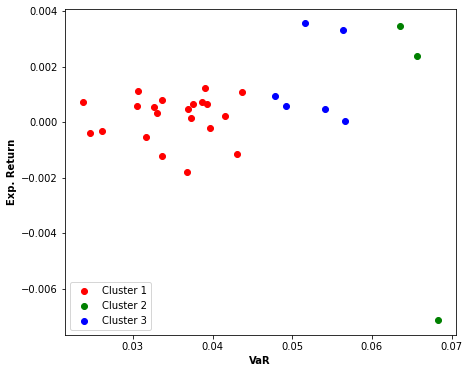

In [10]:
#Scatter Plot of 3 Cluster Average Linkage
plt.figure(figsize = (7, 6))
plt.scatter(df1_al['VaR'], df1_al['Exp. Return'], color='red', label='Cluster 1')
plt.scatter(df2_al['VaR'], df2_al['Exp. Return'], color='green', label='Cluster 2')
plt.scatter(df3_al['VaR'], df3_al['Exp. Return'], color='blue', label='Cluster 3')

plt.xlabel('VaR', fontweight ='bold')
plt.ylabel('Exp. Return', fontweight ='bold')
plt.legend(loc='lower left')

plt.show()